In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf

线性调频信号<p>
s(t) = rect($\frac{t}{T}$)exp(j $\pi$ K $t^2$ )

TBP: 42
N: 419


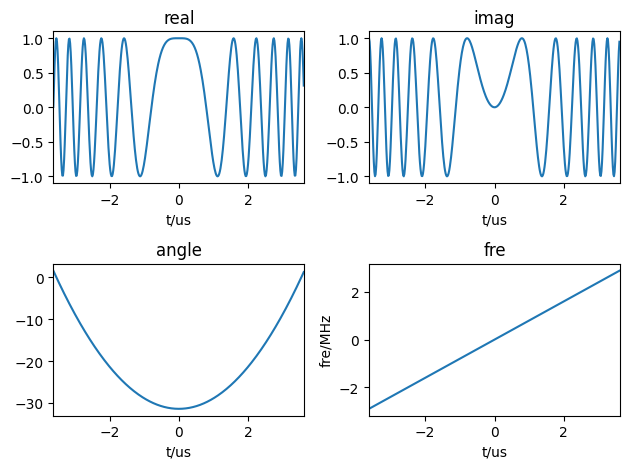

In [45]:
T = 7.24e-6
bandwidth = 5.8e+6
K = bandwidth/T
TBP = round(K*T**2)
ADC_sampling_frequency = 5.8e+7
interval_base = 1/ADC_sampling_frequency
N = int(T*ADC_sampling_frequency)

t_l = np.linspace(-T/2,T/2-interval_base,N)
x_chirp = np.exp(1j*np.pi*K*(t_l**2))
print('TBP:',round(K*T**2))
print('N:',N)

plt.figure()
plt.subplot(2,2,1)
plt.plot(t_l*1e+6,np.real(x_chirp))
plt.xlabel('t/us')
plt.xlim(-T/2*1e+6,T/2*1e+6)
plt.title('real')
plt.subplot(2,2,2)
plt.plot(t_l*1e+6,np.imag(x_chirp))
plt.xlabel('t/us')
plt.xlim(-T/2*1e+6,T/2*1e+6)
plt.title('imag')

plt.subplot(2,2,3)
plt.plot(t_l*1e+6,np.unwrap(np.angle(x_chirp)))
plt.xlabel('t/us')
plt.xlim(-T/2*1e+6,T/2*1e+6)
plt.title('angle')
plt.subplot(2,2,4)
plt.plot(t_l*1e+6,K*t_l*1e-6)
plt.xlabel('t/us')
plt.ylabel('fre/MHz')
plt.xlim(-T/2*1e+6,T/2*1e+6)
plt.title('fre')
plt.tight_layout()

fft: 2048


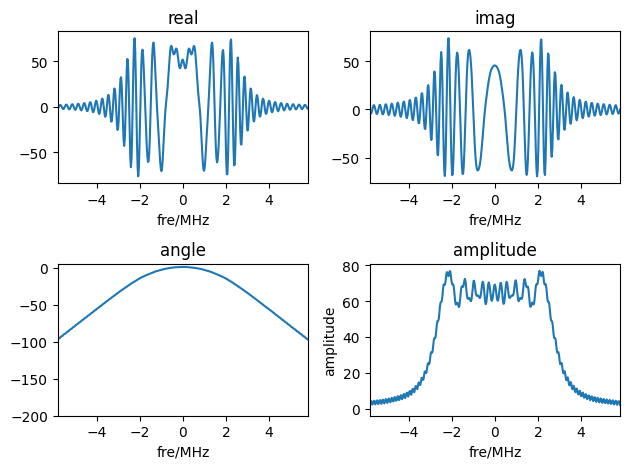

In [46]:
plt.figure()
N_fft = int(4*2**(np.ceil(np.log2(N))))
print('fft:',N_fft)
x_chirp_pad = np.roll(np.concat((x_chirp,np.zeros(N_fft-N))),-int(N/2))
x_chirp_fft = sf.fft(x_chirp_pad)
f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)

plt.subplot(2,2,1)
plt.plot(f_l*1e-6,np.real(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
plt.title('real')
plt.subplot(2,2,2)
plt.plot(f_l*1e-6,np.imag(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
plt.title('imag')

plt.subplot(2,2,3)
plt.plot(f_l*1e-6,np.fft.fftshift(np.unwrap(np.angle((x_chirp_fft)))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
plt.ylim(-200,5)
plt.title('angle')
plt.subplot(2,2,4)
plt.plot(f_l*1e-6,np.abs(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.ylabel('amplitude')
plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
plt.title('amplitude')
plt.tight_layout()

TBP: 720
N: 7198
fft: 32768


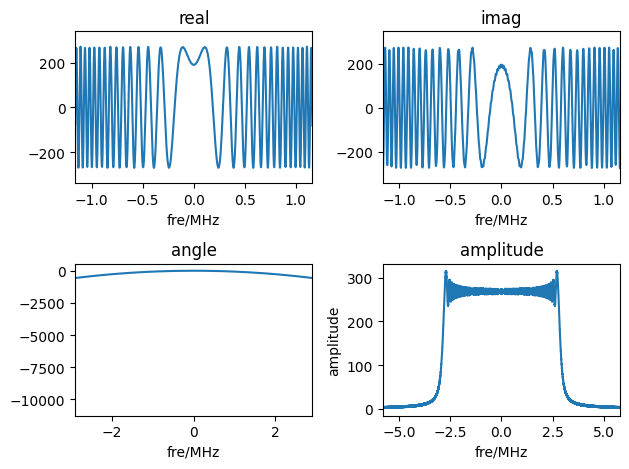

In [47]:
TBP_1 = 720
T = T*TBP_1/TBP
K = bandwidth/T
N = int(T*ADC_sampling_frequency)

t_l = np.linspace(-T/2,T/2-interval_base,N)
x_chirp = np.exp(1j*np.pi*K*(t_l**2))

print('TBP:',round(K*T**2))
print('N:',N)


plt.figure()
N_fft = int(4*2**(np.ceil(np.log2(N))))
print('fft:',N_fft)
x_chirp_pad = np.roll(np.concat((x_chirp,np.zeros(N_fft-N))),-int(N/2))
x_chirp_fft = sf.fft(x_chirp_pad)
f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
plt.subplot(2,2,1)
plt.plot(f_l*1e-6,np.real(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth/5*1e-6,bandwidth/5*1e-6)
plt.title('real')
plt.subplot(2,2,2)
plt.plot(f_l*1e-6,np.imag(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth/5*1e-6,bandwidth/5*1e-6)
plt.title('imag')

plt.subplot(2,2,3)
plt.plot(f_l*1e-6,np.fft.fftshift(np.unwrap(np.angle((x_chirp_fft)))))
plt.xlabel('fre/MHz')
plt.xlim(-bandwidth/2*1e-6,bandwidth/2*1e-6)
plt.title('angle')
plt.subplot(2,2,4)
plt.plot(f_l*1e-6,np.abs(np.fft.fftshift((x_chirp_fft))))
plt.xlabel('fre/MHz')
plt.ylabel('amplitude')
plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
plt.title('amplitude')
plt.tight_layout()

TBP: 25
N: 249
fft: 1024
TBP: 50
N: 499
fft: 2048
TBP: 100
N: 999
fft: 4096
TBP: 200
N: 1999
fft: 8192
TBP: 400
N: 3999
fft: 16384


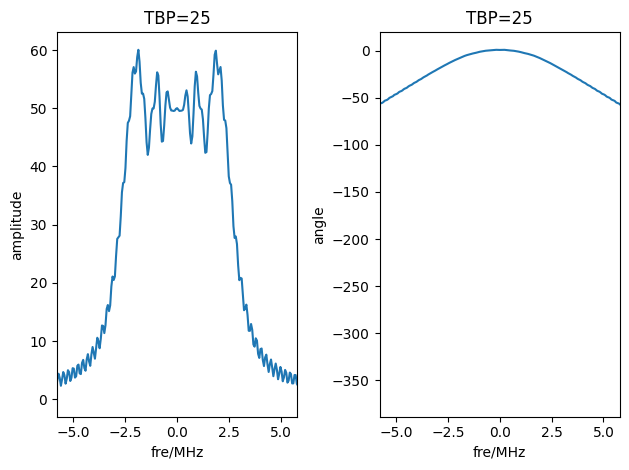

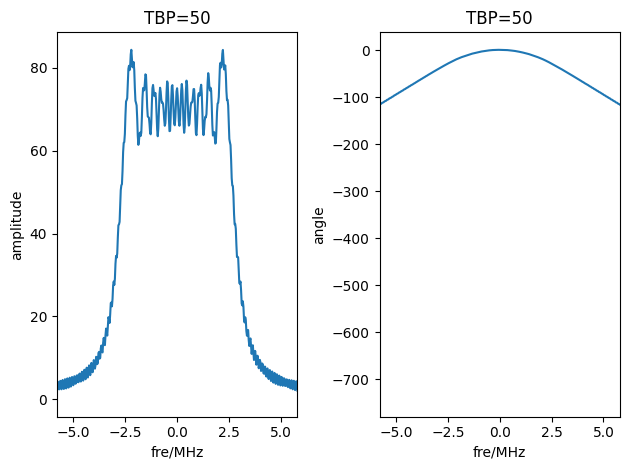

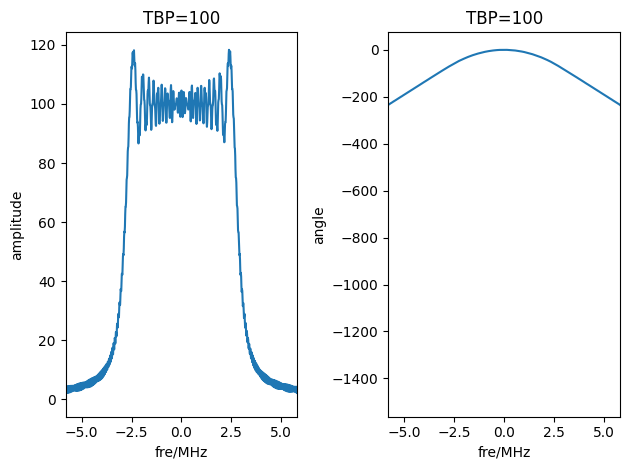

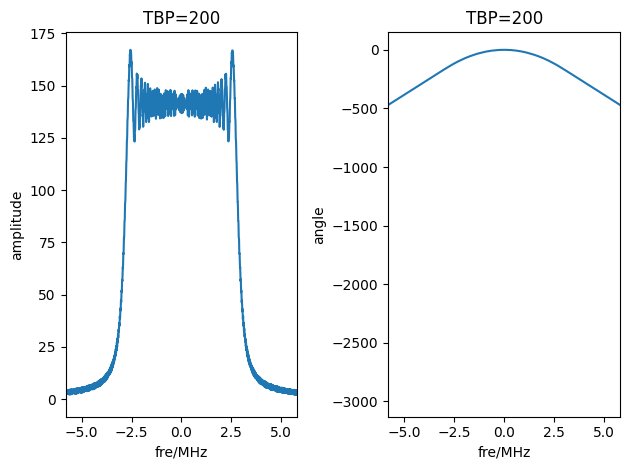

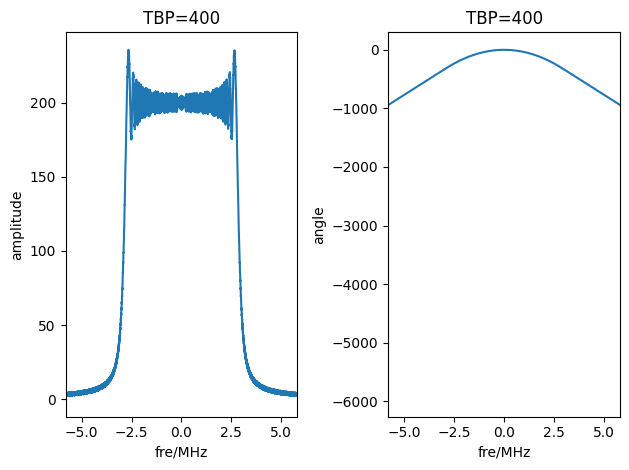

In [51]:
T_0 = 7.24e-6
bandwidth = 5.8e+6
ADC_sampling_frequency = 5.8e+7
interval_base = 1/ADC_sampling_frequency
TBP = [25,50,100,200,400]
for i in range(len(TBP)):
    plt.figure()
    T = T_0*TBP[i]/42
    K = bandwidth/T
    N = int(T*ADC_sampling_frequency)
    t_l = np.linspace(-T/2,T/2-interval_base,N)
    x_chirp = np.exp(1j*np.pi*K*(t_l**2))
    print('TBP:',round(K*T**2))
    print('N:',N)
    N_fft = int(4*2**(np.ceil(np.log2(N))))
    print('fft:',N_fft)
    x_chirp_pad = np.roll(np.concat((x_chirp,np.zeros(N_fft-N))),-int(N/2))
    x_chirp_fft = sf.fft(x_chirp_pad)
    f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)
    plt.subplot(1,2,1)
    plt.plot(f_l*1e-6,np.abs(np.fft.fftshift((x_chirp_fft))))
    plt.xlabel('fre/MHz')
    plt.ylabel('amplitude')
    plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
    plt.title('TBP='+str(TBP[i]))
    plt.subplot(1,2,2)
    plt.plot(f_l*1e-6,np.fft.fftshift(np.unwrap(np.angle((x_chirp_fft)))))
    plt.xlabel('fre/MHz')
    plt.xlim(-bandwidth*1e-6,bandwidth*1e-6)
    plt.ylabel('angle')
    plt.title('TBP='+str(TBP[i]))
    plt.tight_layout()

TBP: 58
N: 81
fft: 512
N: 69
fft: 512
N: 58
fft: 256
N: 46
fft: 256


<Figure size 640x480 with 0 Axes>

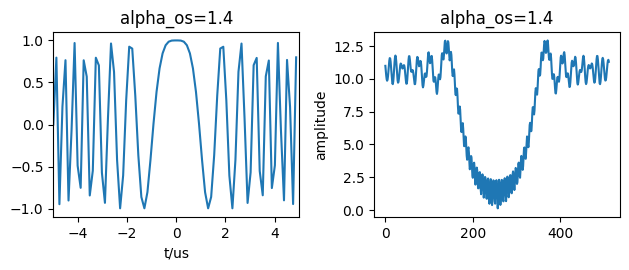

<Figure size 640x480 with 0 Axes>

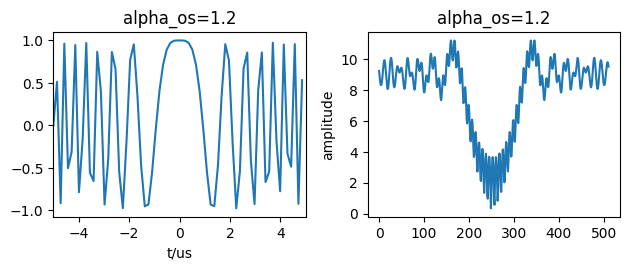

<Figure size 640x480 with 0 Axes>

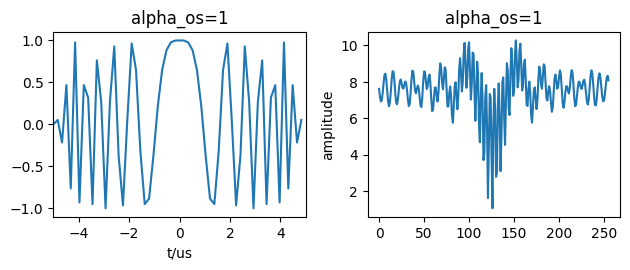

<Figure size 640x480 with 0 Axes>

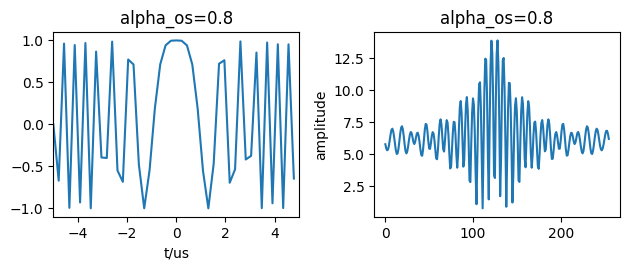

In [49]:
T = 1e-5
bandwidth = 5.8e+6
K = bandwidth/T
TBP = round(K*T**2)
alpha_os = [1.4,1.2,1,0.8]
print('TBP:',round(K*T**2))
for i in range(len(alpha_os)):   
    ADC_sampling_frequency = bandwidth*alpha_os[i]
    interval_base = 1/ADC_sampling_frequency
    N = int(T*ADC_sampling_frequency)
    print('N:',N)

    t_l = np.linspace(-T/2,T/2-interval_base,N)
    x_chirp = np.exp(1j*np.pi*K*(t_l**2))
    plt.figure()
    N_fft = int(4*2**(np.ceil(np.log2(N))))
    print('fft:',N_fft)
    x_chirp_pad = np.roll(np.concat((x_chirp,np.zeros(N_fft-N))),-int(N/2))
    x_chirp_fft = sf.fft(x_chirp_pad)
    f_l = np.linspace(-ADC_sampling_frequency/2,ADC_sampling_frequency/2-ADC_sampling_frequency/N_fft,N_fft)

    plt.figure()
    plt.subplot(2,2,1)
    plt.plot(t_l*1e+6,np.real(x_chirp))
    plt.xlabel('t/us')
    plt.xlim(-T/2*1e+6,T/2*1e+6)
    plt.title('alpha_os='+str(alpha_os[i]))
    plt.subplot(2,2,2)
    plt.plot(np.array(range(N_fft)),np.abs(((x_chirp_fft))))
    plt.ylabel('amplitude')
    plt.title('alpha_os='+str(alpha_os[i]))
    plt.tight_layout()
